#  Human Activity Smartphone-Based Recognition Using Multiclass Classification

Final project for Data Science bootcamp organized by Sages.

 # Table of contents
 
1. [Abstract](#Abstract)   
2. [About dataset](#About-dataset)   
      2.1 [Data representing human activity with labels](#Data-representing-human-activity-with-labels)  
      2.2 [Attribute information](#Attribute-information)   
3. [Prerequisites](#Prerequisites)
4. [Dataset exploration](#Dataset-exploration)
5. [Cluster analysis](#Cluster-analysis)
6. [Data preparation to ML modeling](#Data-preparation-to-ML-modeling)
7. [Modeling](#Modeling)  
      7.1 [Dimensionality Reduction](#Dimensionality-Reduction)    
8. [Tuning models using Grid Search with cross-validation](#Tuning-models-using-Grid-Search-with-cross-validation)  
9. [Summary](#Summary)  
10. [References](#References)  

## Abstract

The aim of this project is to analyze a fitness dataset from a smartphone tracker and build a model that recognises the human activities such as Walking, Walking_Upstairs, Walking_Downstairs, Sitting, Standing or Laying.
Model was built using multiclass classification machine learning techniques (supervised learning) such as Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machines, Naive Bayes Classifier and XGBoost.

## About dataset

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living while carrying a waist-mounted smartphone with embedded inertial sensors. 
The objective is to classify activities into one of the six activities performed. The experiments were carried out on a group of 30 volunteers aged 19-48 years. Thirty healthy adults wore a waist-mounted smartphone with accelerometer (Samsung Galaxy S II - the second smartphone of the Samsung Galaxy S series)) and underwent an array of lying, sitting, standing, and walking, walking upstairs and walking downstairs tasks. Task type, their order, and length were randomly assigned to each participant.

<b>Using its embedded accelerometer and gyroscope researchers received 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz.</b>

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain. The experiments have been video-recorded to label the data manually.

<b>What are Accelerometer and Gyroscope and what is the difference between Accelerometer and Gyroscope?</b>

Accelerometers in mobile phones are used to detect the orientation of the phone. The gyroscope for short, adds an additional dimension to the information supplied by the accelerometer by tracking rotation or twist.

An accelerometer measures the linear acceleration of movement, while a gyroscope measures the angular rotational velocity. Both sensors measure the rate of change.

Triaxial accelerometer can create a 3D vector of acceleration in the form of orthogonal components. 

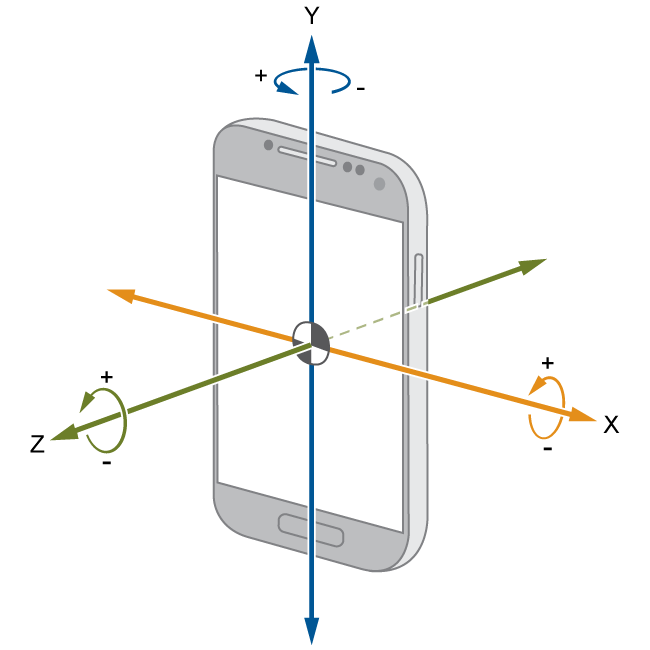

### Data representing human activity with labels

Original dataset link: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones?resource=download

There are "train" and "test" folders containing the split portions of the data for modeling (e.g. 70% / 30%).

The raw dataset is loaded.

<b>Increase the width of a Jupyter Notebook</b>

In [1]:
from IPython.display import display, HTML; display(HTML("<style>.container{width:90% !important;}</style>"))

<b>First, importing the main library</b>

In [2]:
import pandas as pd

<b>Read Train and Test dataset</b>

In [3]:
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')
df = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)

Shape of the train, test and all of dataset is checked

In [4]:
print('Shape of train data:', train_data.shape)
print('Shape of test data:', test_data.shape)
print('Shape of all of data:', df.shape)

Shape of train data: (7352, 563)
Shape of test data: (2947, 563)
Shape of all of data: (10299, 563)


<b>Checking sample 5 rows</b>

In [5]:
# To display all of 563 columns it is necessary to enable option display.max_columns
pd.set_option("display.max_columns", None)

In [6]:
df.sample(5)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
6195           0.312051          -0.001191          -0.117302   
2037           0.262849          -0.027396          -0.095444   
5539           0.274660          -0.023182          -0.096877   
8191           0.240751          -0.021854          -0.160640   
8818           0.303067           0.012765          -0.103375   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
6195          0.033858         -0.190324         -0.263117         -0.081313   
2037         -0.277626          0.001095         -0.198653         -0.331449   
5539         -0.995234         -0.987917         -0.966980         -0.995716   
8191         -0.146189         -0.207159         -0.050381         -0.179402   
8818         -0.066032         -0.030451         -0.582728         -0.100404   

      tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
6195         -0.217652         -0.286928          0.584307          0.030189   
2037          0.004231         -0.167145          0.051338         -0.149557   
5539         -0.988393         -0.966020         -0.942153         -0.574642   
8191         -0.214083         -0.036984          0.086092         -0.003360   
8818         -0.076119         -0.588514          0.049497         -0.056296   

      tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
6195         -0.393676          0.214274          0.253305          0.246206   
2037         -0.178456          0.174961          0.034862          0.603413   
5539         -0.790132          0.843383          0.685262          0.840741   
8191         -0.408260          0.175792          0.337572          0.142302   
8818         -0.433118          0.066480          0.121227          0.601562   

      tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
6195       -0.070579            -0.464601            -0.872131   
2037       -0.116741            -0.737745            -0.805945   
5539       -0.985852            -0.999967            -0.999860   
8191       -0.053550            -0.634089            -0.877728   
8818       -0.119185            -0.562735            -0.816431   

      tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
6195            -0.753708         -0.321695         -0.442960   
2037            -0.709649         -0.454102         -0.197124   
5539            -0.998861         -0.995383         -0.989823   
8191            -0.591127         -0.224878         -0.290068   
8818            -0.918392         -0.167911         -0.434965   

      tBodyAcc-iqr()-Z  tBodyAcc-entropy()-X  tBodyAcc-entropy()-Y  \
6195         -0.403788              0.195643              0.340269   
2037         -0.125031              0.303177              0.340112   
5539         -0.967691             -0.689639             -0.838046   
8191         -0.111948              0.340001              0.031978   
8818         -0.610802              0.358115              0.457228   

      tBodyAcc-entropy()-Z  tBodyAcc-arCoeff()-X,1  tBodyAcc-arCoeff()-X,2  \
6195              0.295367               -0.511703                0.434820   
2037              0.047562               -0.183716               -0.089211   
5539             -0.326824                0.117232               -0.175757   
8191              0.255350               -0.238585                0.125570   
8818              0.047658               -0.443470                0.357882   

      tBodyAcc-arCoeff()-X,3  tBodyAcc-arCoeff()-X,4  tBodyAcc-arCoeff()-Y,1  \
6195               -0.201927                0.125761               -0.123783   
2037                0.382966               -0.123922               -0.081491   
5539                0.197361                0.072733                0.251859   
8191                0.153910                0.038910               -0.132249   
8818               -0.130516                0.119644               -0.305740   

      tBodyAc

### Attribute information

#### 561-feature vector with time and frequency domain variables 

<b>Feature names and units <b/>
    
1. '3-axial linear acceleration'(tAcc-XYZ) from accelerometer and '3-axial angular velocity' (tGyro-XYZ) from Gyroscope with several variations:

    - prefix 't' in those metrics denotes time.

    - suffix 'XYZ' represents 3-axial signals in X , Y, and Z directions.
    
    
2. The accelertion signal was saperated into Body and Gravity acceleration signals(tBodyAcc-XYZ and tGravityAcc-XYZ) using some low pass filter with corner frequecy of 0.3Hz.

3. The body linear acceleration and angular velocity were derived in time to obtian jerk signals (tBodyAccJerk-XYZ and tBodyGyroJerk-XYZ).

4. The magnitude of these 3-dimensional signals were calculated using the Euclidian norm. This magnitudes are represented as features with names like tBodyAccMag, tGravityAccMag, tBodyAccJerkMag, tBodyGyroMag and tBodyGyroJerkMag.

5. We've got frequency domain signals from some of the available signals by applying a FFT (Fast Fourier Transform). 
    These signals obtained were labeled with prefix 'f' just like original signals with prefix 't'. These signals are labeled as fBodyAcc-XYZ, fBodyGyroMag etc.

6. The units used for the accelerations (total and body) are 'g's (gravity of earth -> 9.80665 m/seg2). 
    
7. The gyroscope units are rad/seg.

#### An identifier of the subject who carried out the experiment - 30 volunteers

In [7]:
df['subject'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], dtype=int64)

#### An activity label

In [8]:
df['Activity'].sort_values().unique()

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## Prerequisites

<b>Import of the necessery modules</b>

In [9]:
import numpy as np 

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

from collections import Counter

# Scaler
from sklearn.preprocessing import MinMaxScaler

# Feature extraction
from sklearn.decomposition import PCA

# Feature selection
from sklearn.feature_selection import SelectFromModel

# Models to multiclass classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Cluster
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

import pprint

## Dataset exploration

List of all features with their types. 

In [10]:
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 563 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    tBodyAcc-mean()-X                     float64
 1    tBodyAcc-mean()-Y                     float64
 2    tBodyAcc-mean()-Z                     float64
 3    tBodyAcc-std()-X                      float64
 4    tBodyAcc-std()-Y                      float64
 5    tBodyAcc-std()-Z                      float64
 6    tBodyAcc-mad()-X                      float64
 7    tBodyAcc-mad()-Y                      float64
 8    tBodyAcc-mad()-Z                      float64
 9    tBodyAcc-max()-X                      float64
 10   tBodyAcc-max()-Y                      float64
 11   tBodyAcc-max()-Z                      float64
 12   tBodyAcc-min()-X                      float64
 13   tBodyAcc-min()-Y                      float64
 14   tBodyAcc-min()-Z                      float64
 15   

Types of data: float64(561), int64(1), object(1). Only 'Activity' feature isn't numerical data.

In [11]:
df.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.992360         -0.976990         -0.979137         -0.993293   
50%           -0.943030         -0.835032         -0.850773         -0.948244   
75%           -0.250293         -0.057336         -0.278737         -0.302033   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  tBodyAcc-max()-Y  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.525697         -0.614989         -0.466732         -0.305180   
std            0.484201          0.399034          0.538707          0.279920   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.977017         -0.979064         -0.935788         -0.562570   
50%           -0.843670         -0.845068         -0.874825         -0.468206   
75%           -0.087405         -0.288149         -0.014641         -0.067345   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-max()-Z  tBodyAcc-min()-X  tBodyAcc-min()-Y  tBodyAcc-min()-Z  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.562230          0.525304          0.389537          0.598022   
std            0.282991          0.356589          0.338844          0.290615   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.812194          0.212530          0.113900          0.392717   
50%           -0.724503          0.784233          0.619774          0.772226   
75%           -0.345591          0.843793          0.685194          0.836742   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-sma()  tBodyAcc-energy()-X  tBodyAcc-energy()-Y  \
count    10299.000000         10299.000000         10299.000000   
mean        -0.552087            -0.825460            -0.902704   
std          0.461375             0.247052             0.125988   
min         -1.000000            -1.000000            -1.000000   
25%         -0.981706            -0.999929            -0.999771   
50%         -0.876947            -0.997736            -0.992909   
75%         -0.122829            -0.715745            -0.825149   
max          1.000000             1.000000             1.000000   

       tBodyAcc-energy()-Z  tBodyAcc-iqr()-X  tBodyAcc-iqr()-Y  \
count         10299.000000      10299.000000      10299.000000   
mean             -0.854662         -0.689162         -0.643512   
std               0.205998          0.359209          0.368865   
min              -1.000000         -1.000000         -1.000000   
25%              -0.999414         -0.994185         -0.981327   
50%              -0.984240         -0.955999         -0.884947   
75%              -0.759473         -0.407902         -0.324653   
max               1.000000          1.000000          1.000000   

       tBodyAcc-iqr()-Z

Describe function on  dataframe gives us statistical measures, such as mean standard deviation, min, max, and quartiles for all numeric values (all of column without label - Activity). We can see on top here that we have a count of the number of records. There are 10299 records in this dataset. All of these records are complete with no missing fields. The second information - Maximum and Minimum for all of columns are composed of just -1's and 1's. What mean that features are normalized. 

There are all kinds of interesting tidbits of information to be gleaned from this quick statistical overview of data.

Check the maximum and minimum values and null values by another way

In [12]:
print("Minimum value:", df.iloc[:, :-2].min().value_counts())
print("Maximum value:", df.iloc[:, :-2].max().value_counts())
print("Count of null value:", df.isnull().sum().sum())

Minimum value: -1.0    561
dtype: int64
Maximum value: 1.0    561
dtype: int64
Count of null value: 0


Count most common name of columns (without statistical measures names and axes)

In [13]:
df_names_column = []

for name in df.columns:
    df_names_column.append(name.split('-')[0])
    
cnt = Counter()

for i in range(0,len(df_names_column)):
    cnt[df_names_column[i]] += 1
    
cnt.most_common()

[('fBodyAcc', 79),
 ('fBodyAccJerk', 79),
 ('fBodyGyro', 79),
 ('tBodyAcc', 40),
 ('tGravityAcc', 40),
 ('tBodyAccJerk', 40),
 ('tBodyGyro', 40),
 ('tBodyGyroJerk', 40),
 ('tBodyAccMag', 13),
 ('tGravityAccMag', 13),
 ('tBodyAccJerkMag', 13),
 ('tBodyGyroMag', 13),
 ('tBodyGyroJerkMag', 13),
 ('fBodyAccMag', 13),
 ('fBodyBodyAccJerkMag', 13),
 ('fBodyBodyGyroMag', 13),
 ('fBodyBodyGyroJerkMag', 13),
 ('angle(tBodyAccMean,gravity)', 1),
 ('angle(tBodyAccJerkMean),gravityMean)', 1),
 ('angle(tBodyGyroMean,gravityMean)', 1),
 ('angle(tBodyGyroJerkMean,gravityMean)', 1),
 ('angle(X,gravityMean)', 1),
 ('angle(Y,gravityMean)', 1),
 ('angle(Z,gravityMean)', 1),
 ('subject', 1),
 ('Activity', 1)]

In [14]:
acc = 0
gyro = 0
gravity = 0
other = 0

for value in df.columns:
    
    if "Acc" in str(value):
        acc += 1
    elif "Gyro" in str(value):
        gyro += 1
    else:
        other += 1

graph = go.Bar(x=['Accelerometer', 'Gyroscope', 'Others'], y=[acc, gyro, other])

fig = go.Figure(graph)

fig.update_layout(
    title_text="Counts of accelerometer, gyroscope and others",
    autosize=False,
    width=500,
    height=500,
    yaxis=dict(title_text="Count"))

fig.update_yaxes(automargin=True)

fig.show()

The most features refer to acceleration and gyroscope. There are also several gravity functions and angles.

<b>Visualizing Relationships in the Data</b>

Let's plot a few graphs in matplotlib in order to view information about activity of participants.

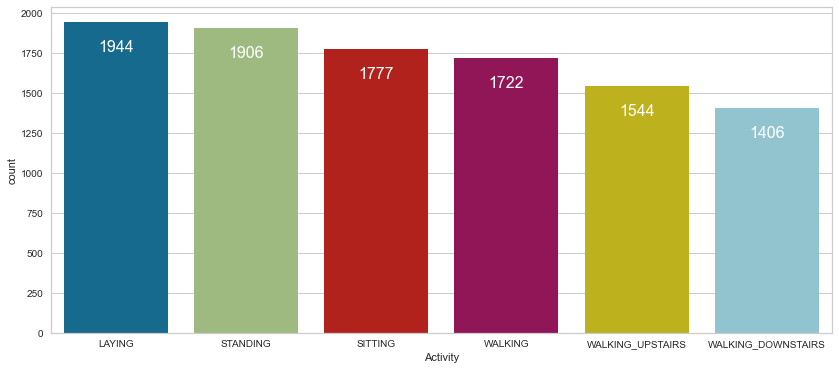

In [15]:
# Start off with a simple countplot representing amount of records referring to different types of activities.

plt.figure(figsize=(14, 6))

ax = sns.countplot(x='Activity', data=df, order=df['Activity'].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=16)
    
# Here is what the resulting visualization looks like.

plt.show()

In [16]:
df_group = pd.DataFrame(df.groupby('Activity').size())
df_group.columns = ['Count_of_all']
print(df_group.sum())
df_group['Percentage[%]'] = df_group['Count_of_all'].apply(lambda x: round(x/10299*100,2))
df_group

Count_of_all    10299
dtype: int64


Count_of_all  Percentage[%]
Activity                                       
LAYING                      1944          18.88
SITTING                     1777          17.25
STANDING                    1906          18.51
WALKING                     1722          16.72
WALKING_DOWNSTAIRS          1406          13.65
WALKING_UPSTAIRS            1544          14.99

The labels are quite equally distributed, but participants clearly spend more time lying than walking upstairs.

Let's check the percentage distribution on train and test data

In [17]:
df_group = pd.DataFrame(train_data.groupby('Activity').size())
df_group.columns = ['Count_of_train']
print(df_group.sum())
df_group['Percentage[%]'] = df_group['Count_of_train'].apply(lambda x: round(x/7352*100,2))
df_group

Count_of_train    7352
dtype: int64


Count_of_train  Percentage[%]
Activity                                         
LAYING                        1407          19.14
SITTING                       1286          17.49
STANDING                      1374          18.69
WALKING                       1226          16.68
WALKING_DOWNSTAIRS             986          13.41
WALKING_UPSTAIRS              1073          14.59

In [18]:
df_group = pd.DataFrame(test_data.groupby('Activity').size())
df_group.columns = ['Count_of_test']
print(df_group.sum())
df_group['Percentage[%]'] = df_group['Count_of_test'].apply(lambda x: round(x/2947*100,2))
df_group

Count_of_test    2947
dtype: int64


Count_of_test  Percentage[%]
Activity                                        
LAYING                        537          18.22
SITTING                       491          16.66
STANDING                      532          18.05
WALKING                       496          16.83
WALKING_DOWNSTAIRS            420          14.25
WALKING_UPSTAIRS              471          15.98

We can see a pretty similar distribution of each class hovering between 14.5% and 19% of the dataset.

Counts of sensor readings for each participants on histogram

In [19]:
fig = px.histogram(df, x='subject', color="Activity", barmode='group', title="Activity for each user")

fig.show()

For number 1 we can see clearly more readings for walking activity compering to others, but there are no significant difference in reading for other activities.

On histograms we can also see most frequency task type with static ativities (standing, sitting and lying) for parameter's accelerometer until -1.0 to -0.8 m/s<sup>2</sup>, what we can observe on first column and also walking (~-0.4 m/s<sup>2</sup>) on X axis.

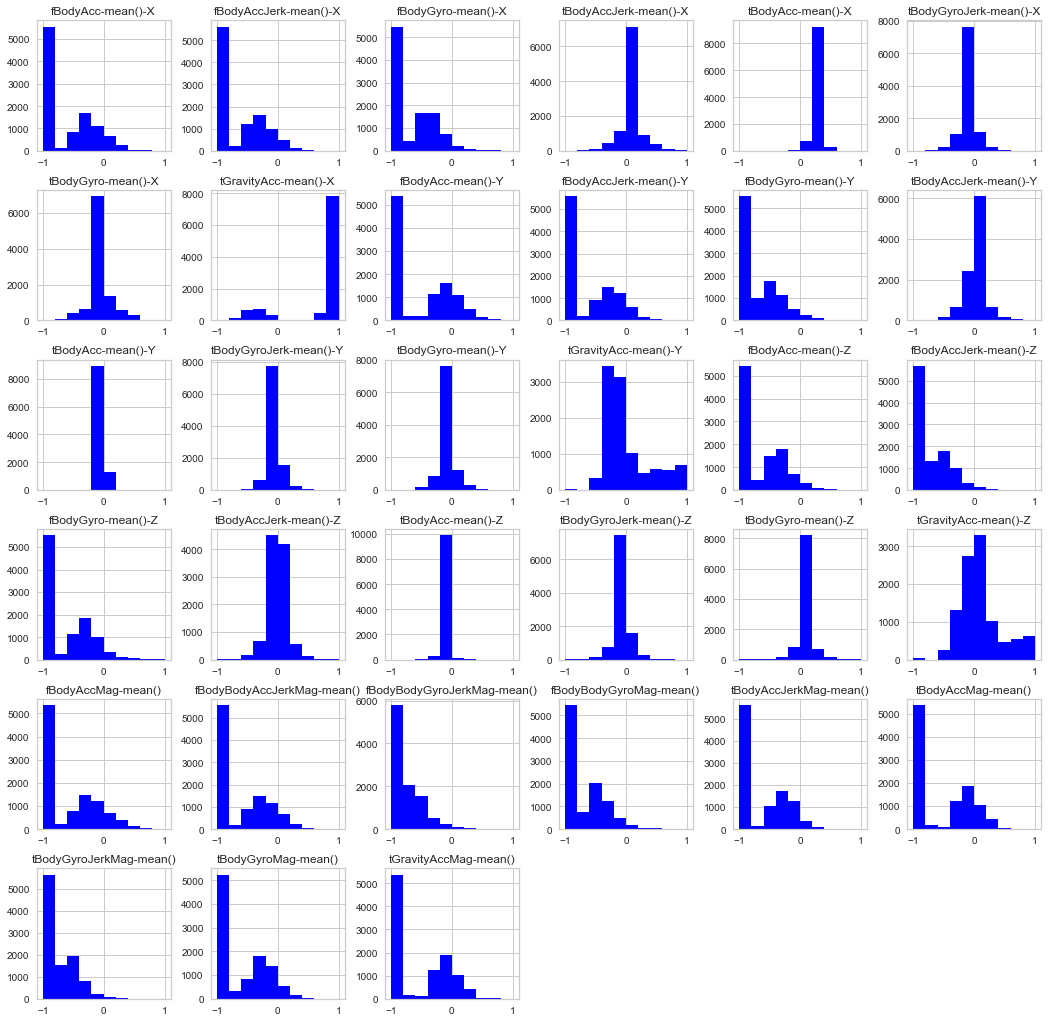

In [20]:
df_columns = df[['fBodyAcc-mean()-X', 'fBodyAccJerk-mean()-X', 'fBodyGyro-mean()-X', 'tBodyAccJerk-mean()-X', 'tBodyAcc-mean()-X', 'tBodyGyroJerk-mean()-X', 'tBodyGyro-mean()-X', 'tGravityAcc-mean()-X',
                   'fBodyAcc-mean()-Y', 'fBodyAccJerk-mean()-Y', 'fBodyGyro-mean()-Y', 'tBodyAccJerk-mean()-Y', 'tBodyAcc-mean()-Y', 'tBodyGyroJerk-mean()-Y', 'tBodyGyro-mean()-Y', 'tGravityAcc-mean()-Y',
                   'fBodyAcc-mean()-Z', 'fBodyAccJerk-mean()-Z', 'fBodyGyro-mean()-Z', 'tBodyAccJerk-mean()-Z', 'tBodyAcc-mean()-Z', 'tBodyGyroJerk-mean()-Z', 'tBodyGyro-mean()-Z', 'tGravityAcc-mean()-Z',
                   'fBodyAccMag-mean()', 'fBodyBodyAccJerkMag-mean()', 'fBodyBodyGyroJerkMag-mean()', 'fBodyBodyGyroMag-mean()','tBodyAccJerkMag-mean()','tBodyAccMag-mean()', 'tBodyGyroJerkMag-mean()', 
                   'tBodyGyroMag-mean()', 'tGravityAccMag-mean()'
              ]]

df_columns.hist(sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, color='blue',figsize=(18,18))

plt.show()

Create function 'activity_for_subject' to plot mean for fBodyAcc, fBodyAccMag, fBodyGyro, angle and information about activities.

In [21]:
def activity_for_subject(subject):
    s = df['Activity'][df['subject']==subject]
    activity = pd.DataFrame(s.values,s.index)
    activity.columns = ['activ']
    activity.reset_index(inplace = True)
    activity = activity.sort_values(by=['activ', 'index'])
    activity['lag'] = activity['index'].shift(periods=-1)
    activity['diff'] = activity['lag'] - activity['index']
    activity = activity.drop(activity[(activity['diff'] == 1) | (activity['diff'] == -1)].index)
    activity = activity[['index','activ']]
    activity = activity.sort_values('index', ascending=True)
    activity = activity.values.tolist()
    
    participant_X_fBodyAcc = df[['fBodyAcc-mean()-X']][df['subject']==subject]
    participant_Y_fBodyAcc = df[['fBodyAcc-mean()-Y']][df['subject']==subject]
    participant_Z_fBodyAcc = df[['fBodyAcc-mean()-Z']][df['subject']==subject]   
    
    participant_fBodyAccMag = df[['fBodyAccMag-mean()']][df['subject']==subject]
    
    participant_X_fBodyGyro = df[['fBodyGyro-mean()-X']][df['subject']==subject]
    participant_Y_fBodyGyro = df[['fBodyGyro-mean()-Y']][df['subject']==subject]
    participant_Z_fBodyGyro = df[['fBodyGyro-mean()-Z']][df['subject']==subject]
    
    participant_angle_X_gravityMean = df[['angle(X,gravityMean)']][df['subject']==subject]
    participant_angle_Y_gravityMean = df[['angle(Y,gravityMean)']][df['subject']==subject]    
    participant_angle_Z_gravityMean = df[['angle(Z,gravityMean)']][df['subject']==subject]
    
    plt.figure(figsize=(30, 15))
    x1 = participant_X_fBodyAcc.index
    x2 = participant_Y_fBodyAcc.index
    x3 = participant_Z_fBodyAcc.index
    x4 = participant_fBodyAccMag.index
    x5 = participant_X_fBodyGyro.index
    x6 = participant_Y_fBodyGyro.index
    x7 = participant_Z_fBodyGyro.index
    x8 = participant_angle_X_gravityMean.index
    x9 = participant_angle_Y_gravityMean.index   
    x10 = participant_angle_Z_gravityMean.index    
    
    y1 = participant_X_fBodyAcc
    y2 = participant_Y_fBodyAcc
    y3 = participant_Z_fBodyAcc
    y4 = participant_fBodyAccMag
    y5 = participant_X_fBodyGyro
    y6 = participant_Y_fBodyGyro
    y7 = participant_Z_fBodyGyro
    y8 = participant_angle_X_gravityMean
    y9 = participant_angle_Y_gravityMean  
    y10 = participant_angle_Z_gravityMean   
    
    plt.subplot(4, 1, 1)
    plt.plot(x1, y1, color='purple', ls='-')
    plt.plot(x2, y2, color='green', ls='-')
    plt.plot(x3, y3, color='blue', ls='-')  
    
    for i in range(0, len(activity)):

        plt.axvline(activity[i][0], color='m', ls=':', lw=1)

        plt.text(activity[i][0], -0.90, activity[i][1], color='red', ha="right", fontsize=9, rotation=60)
        plt.axvline(activity[i][0], color='m', ls=':', lw=1)
    
    plt.title('fBodyAcc')
    plt.grid(False)
    plt.ylabel('XYZ')
    
    plt.subplot(4, 1, 2)
    plt.plot(x4, y4, color='black', ls='-')
    
    for i in range(0, len(activity)):

        plt.axvline(activity[i][0], color='m', ls=':', lw=1)
        
        plt.text(activity[i][0], -0.95, activity[i][1], color='red', ha="right", fontsize=9, rotation=60)
        plt.axvline(activity[i][0], color='m', ls=':', lw=1)
    
    plt.title('fBodyAccMag')
    plt.grid(False)
    plt.ylabel('mean')
    
    plt.subplot(4, 1, 3)
    plt.plot(x5, y5, color='purple', ls='-')
    plt.plot(x6, y6, color='green', ls='-')
    plt.plot(x7, y7, color='blue', ls='-')

    for i in range(0, len(activity)):

        plt.axvline(activity[i][0], color='m', ls=':', lw=1)
        
        plt.text(activity[i][0], -0.95, activity[i][1], color='red', ha="right", fontsize=9, rotation=60)
        plt.axvline(activity[i][0], color='m', ls=':', lw=1)
    
    plt.title('fBodyGyro')
    plt.grid(False)
    plt.ylabel('XYZ')
    
    plt.subplot(4, 1, 4)
    plt.plot(x8, y8, color='purple', ls='-')
    plt.plot(x9, y9, color='green', ls='-')
    plt.plot(x10, y10, color='blue', ls='-')  

    for i in range(0, len(activity)):

        plt.axvline(activity[i][0], color='m', ls=':', lw=1)

        plt.text(activity[i][0], -0.95, activity[i][1], color='red', ha="right", fontsize=9, rotation=60)
        plt.axvline(activity[i][0], color='m', ls=':', lw=1)
    
    plt.title('angle(XYZ,gravityMean)')
    plt.grid(False)
    plt.ylabel('XYZ')    
    
    plt.show()

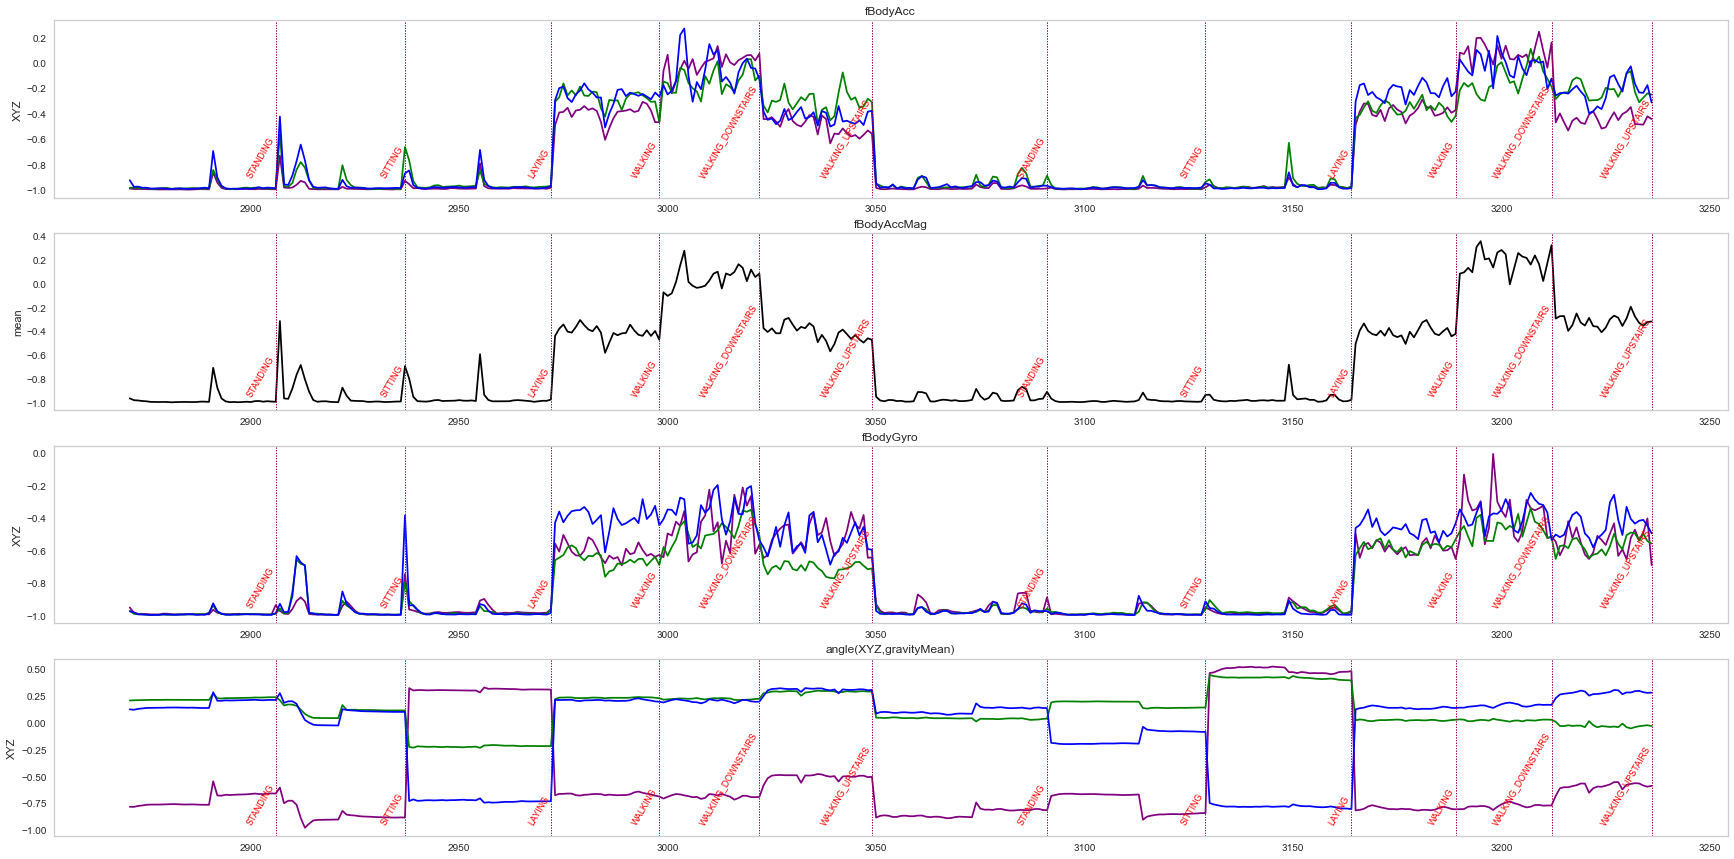

In [22]:
# Plot for 1th participant
activity_for_subject(16)

The body posture (lying, sitting, walking or standing) can be accurately determined by a metric that is calculated from the raw triaxial data from a single waist-worn triaxial accelerometer and denotes the accelerometer orientation in terms of the gravity vector. 
Single accelerometers distinguish sitting from walking, but it is somewhat difficult to distinguish sitting from standing. The graphs show that when going down the stairs they have the highest accelerometer values (above 0 for the X axis).
At the last plot we can see angle(X,gravityMean), angle(Y,gravityMean), angle(Z,gravityMean). LYING activity considerably stand out from other activities.

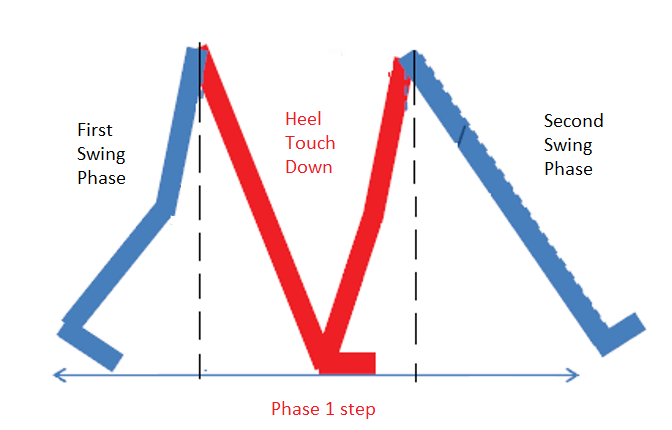

Representation of swing and heel-touchdown phases during walking cycle

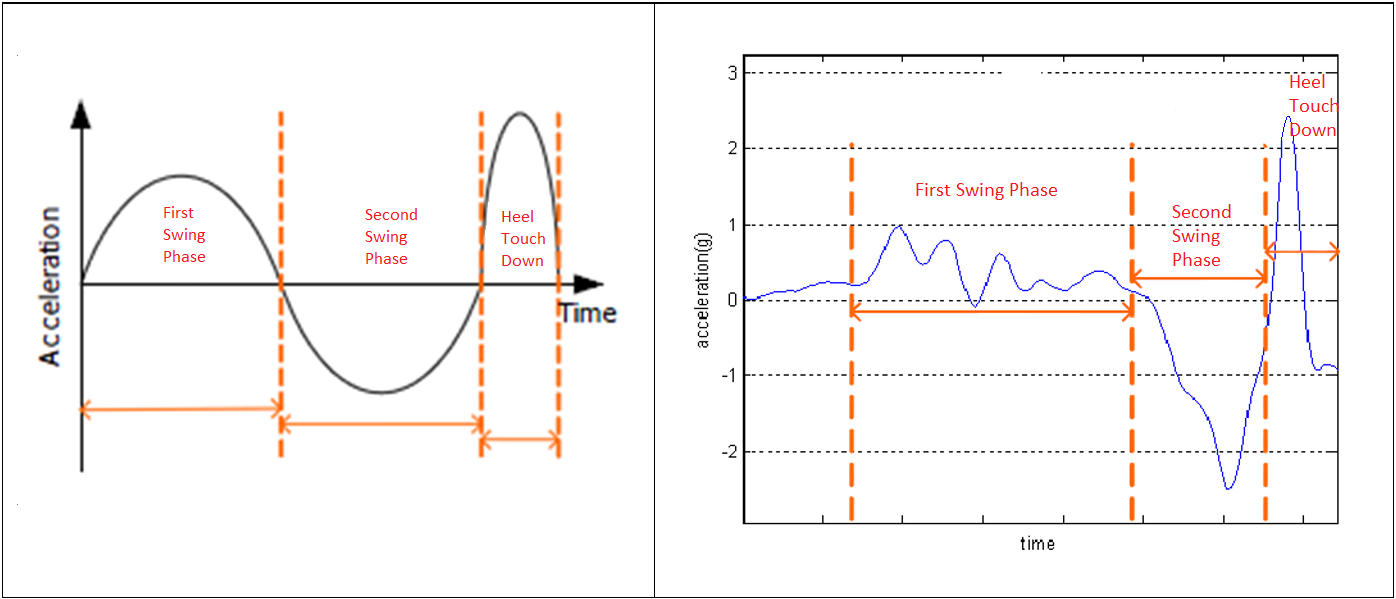

In each modern smartphone it's possible to estimate the distance covered by the user using sensor readings from a 3-axis accelerometer. First comes step detection where each individual step taken by the user is identified. Subsequently, we determine stride length, based on the inverted pendulum model and the periodicity of accelerations generated by humans. Lastly, we obtain the total distance covered during the walk.

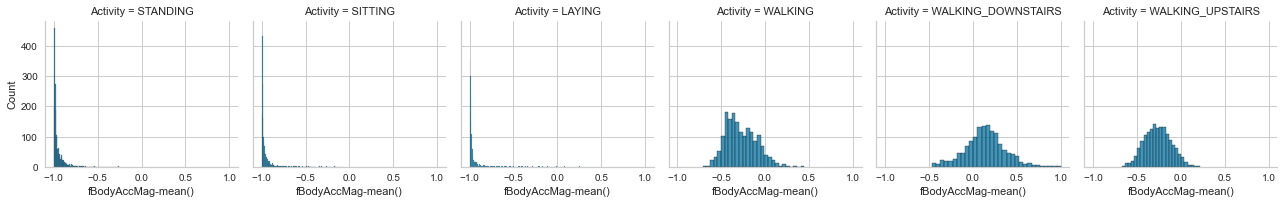

In [23]:
ax = sns.FacetGrid(df, col="Activity")

ax.map_dataframe(sns.histplot, x="fBodyAccMag-mean()");

We can clearly see the difference between stationary activities (STANDING, SITTING, LYING) (fBodyAccMag-mean() is < -0.7 m/s<sup>2</sup> for all) and moving activities (WALKING (~ -0.4 m/s<sup>2</sup>), WALKING_DOWNSTAIRS (~ 0.2 m/s<sup>2</sup>), WALKING_DOWNSTAIRS, WALKING_UPSTAIRS (~ -0.2 m/s<sup>2</sup>)). For only WALKING_DOWNSTAIRS activity tAccfBodyAccMag-mean() is > 0.0.

Let's look closer at the activities

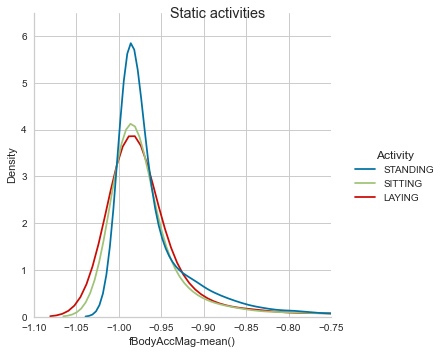

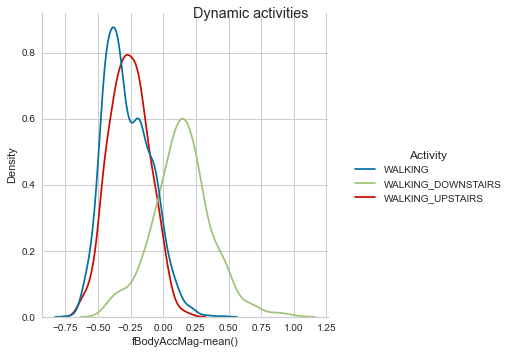

In [24]:
plot1 = sns.displot(data=df[(df["Activity"]=="SITTING") | (df["Activity"]=="STANDING") | (df["Activity"]=="LAYING")], x="fBodyAccMag-mean()", hue="Activity", kind="kde" )
plt.axis([-1.1, -0.75, 0, 6.5])
plot1.fig.suptitle('Static activities')

plot2 = sns.displot(data=df[(df["Activity"]=="WALKING") | (df["Activity"]=="WALKING_DOWNSTAIRS") | (df["Activity"]=="WALKING_UPSTAIRS")], x="fBodyAccMag-mean()", hue="Activity", kind="kde" )
plot2.fig.suptitle('Dynamic activities');

I suppose, there will be difficulties with classify between SITTING and LYING and between WALKING and WALKING_UPSTAIRS.

## Cluster analysis

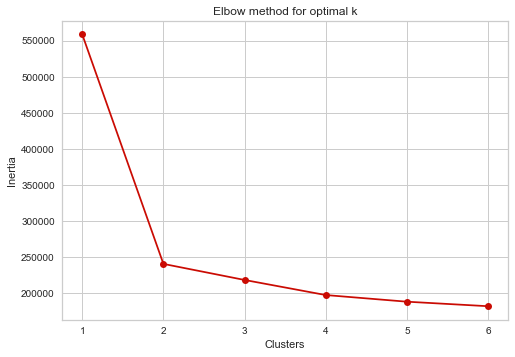

In [25]:
#Cluster analysis - method of grouping the entities based on similarities (unsupervised classification techniques)

# First method - getting the optimal number of clusters using elbow method with inertia

features = df.iloc[:,:-2]

inertia = []
for n in range(1, 7):
    kmeans = KMeans(n_clusters=n, algorithm='lloyd')
    kmeans.fit(features)
    inertia.append([n, kmeans.inertia_])
    
inertia = pd.DataFrame(inertia, columns = ['Clusters', 'Inertia'])

plt.plot(inertia['Clusters'],inertia['Inertia'], 'ro-')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for optimal k')
plt.show()

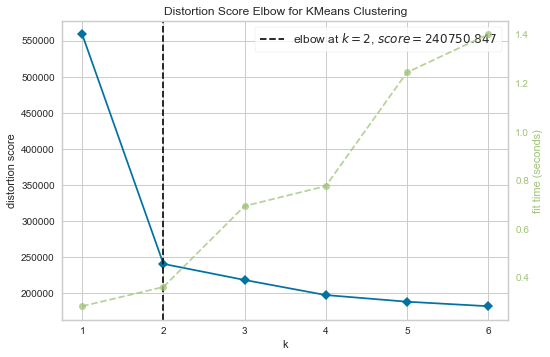

2

In [26]:
# Second method - Getting the optimal number of clusters using elbow method with KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(1,7))

visualizer.fit(features)   # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure
visualizer.elbow_value_ 

In the above plots, the elbow is at k=2 (i.e. sum of squared distances falls suddenly) indicating the optimal k for this dataset is 2.

Let's check clustering the data points with 2 clusters.

In [27]:
km_model_2 = KMeans(n_clusters=2).fit(features)

y_predicted = km_model_2.labels_

<Figure size 1152x864 with 0 Axes>

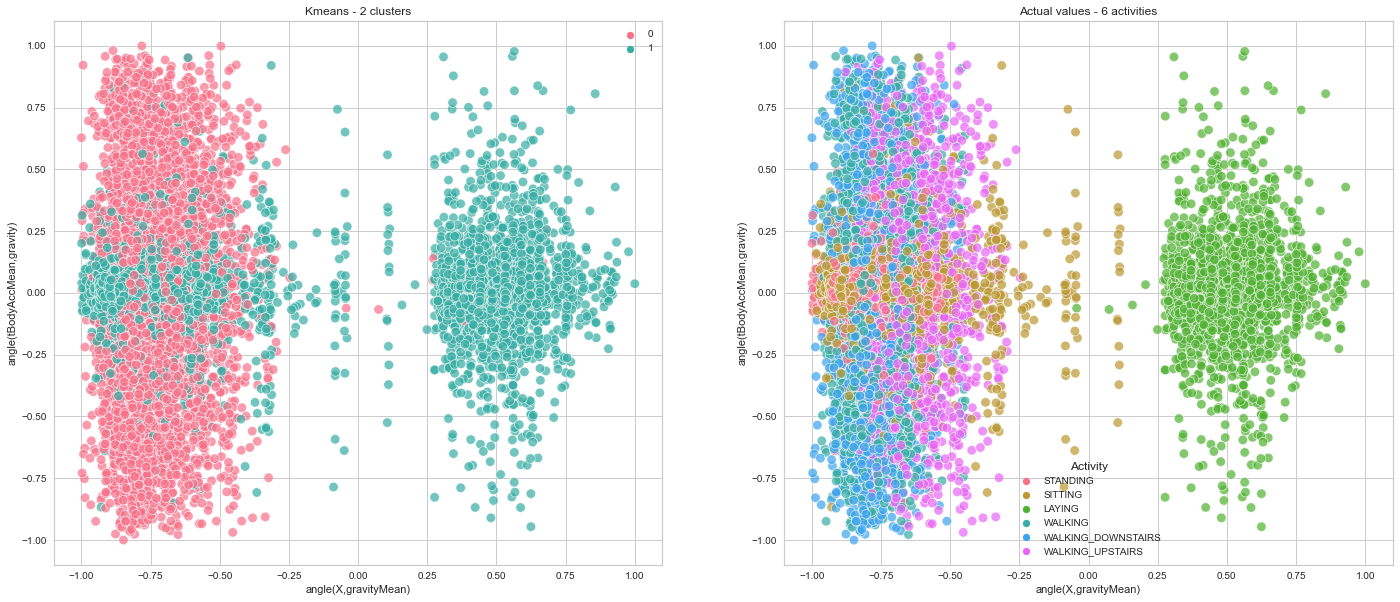

In [28]:
plt.figure(figsize=(16, 12))

f, axes = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(24)

sns.scatterplot(x = features["angle(X,gravityMean)"], y=features["angle(tBodyAccMean,gravity)"], hue=y_predicted, 
                alpha=0.7, s=90, palette=sns.color_palette('husl',2), ax=axes[0]).set_title("Kmeans - 2 clusters")

sns.scatterplot(x = features["angle(X,gravityMean)"], y=features["angle(tBodyAccMean,gravity)"], hue=df['Activity'], 
                alpha=0.7, s=90, palette=sns.color_palette('husl',6), ax=axes[1]).set_title("Actual values - 6 activities")

plt.show();

On the left plot, we can see that LYING group stand out from the rest of activities.

Using 2 clusters will group the data into first cluster formed of static activities like LYING, SITTING and STANDING and the second cluster formed of more dynamic activities like WALKING, WALKING_DOWNSTAIRS and WALKING_UPSTAIRS.

Let's divide the data into 6 clusters on angle(X,gravityMean) and angle(Z,gravityMean)

In [29]:
km_model_6 = KMeans(n_clusters=6).fit(features)

y_predicted = km_model_6.labels_

<Figure size 1152x864 with 0 Axes>

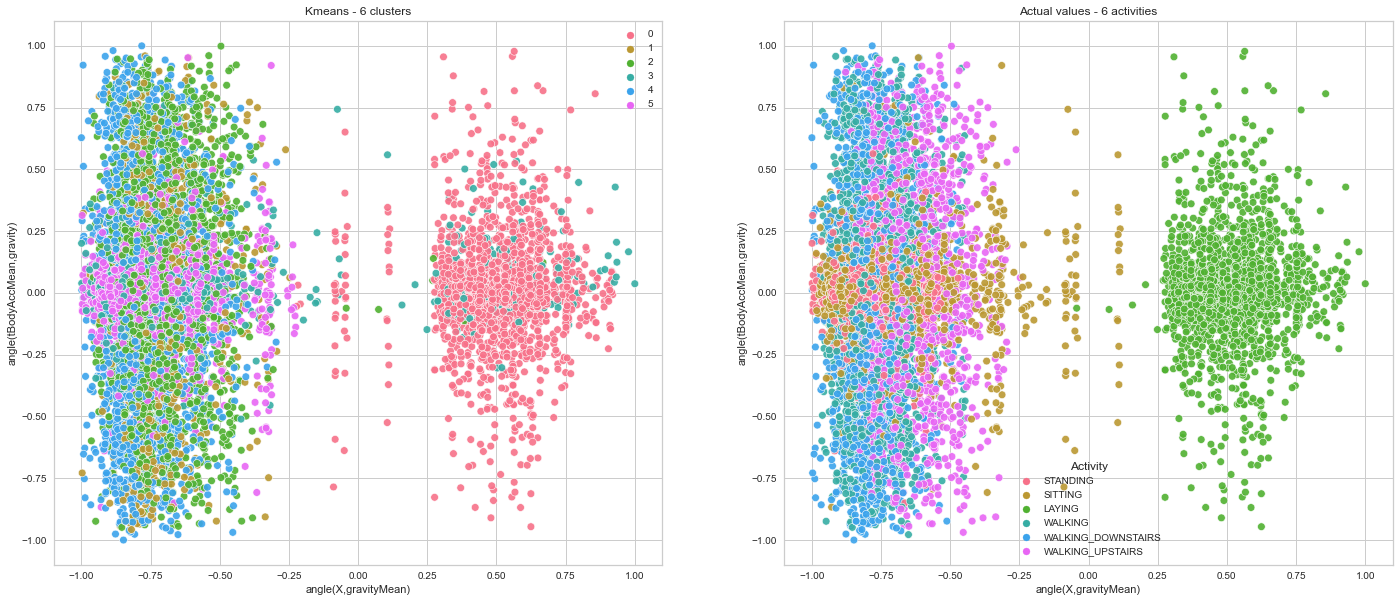

In [30]:
plt.figure(figsize=(16, 12))

f, axes = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(24)

sns.scatterplot(x = features["angle(X,gravityMean)"], y=features["angle(tBodyAccMean,gravity)"], hue=y_predicted, 
                alpha=0.9, s=60, palette=sns.color_palette('husl',6), ax=axes[0]).set_title("Kmeans - 6 clusters")

sns.scatterplot(x = features["angle(X,gravityMean)"], y=features["angle(tBodyAccMean,gravity)"], hue=df['Activity'], 
                alpha=0.9, s=60, palette=sns.color_palette('husl',6), ax=axes[1]).set_title("Actual values - 6 activities")

plt.show();

<Figure size 1152x864 with 0 Axes>

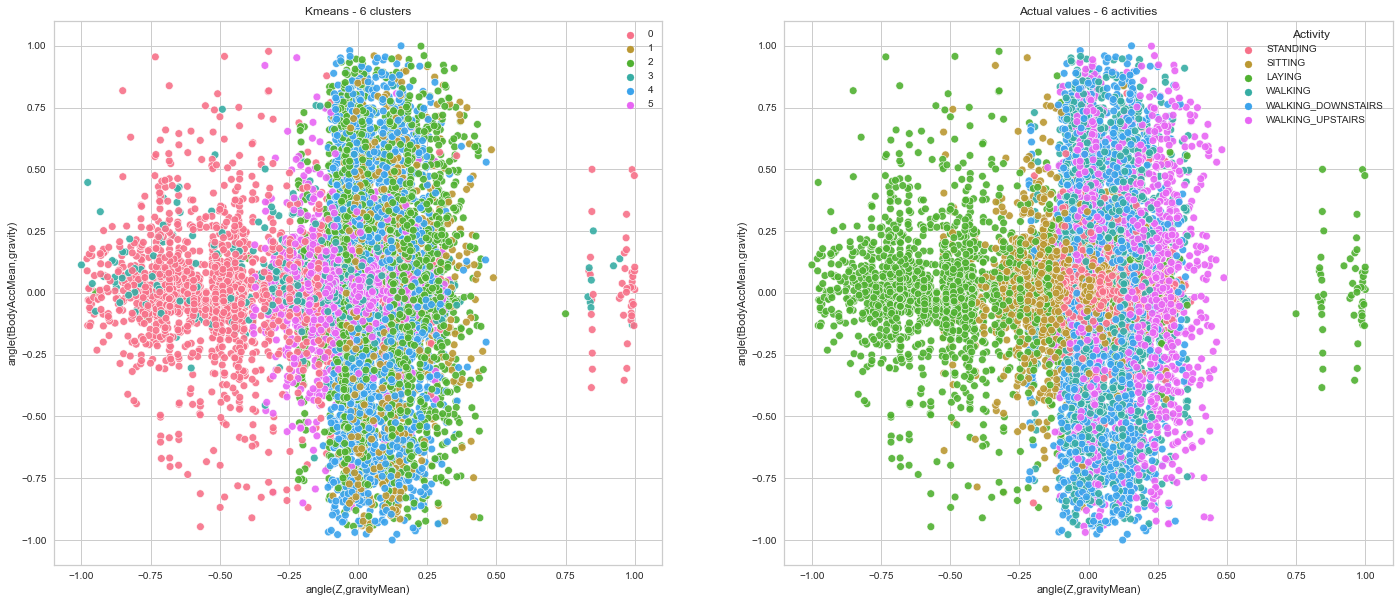

In [31]:
plt.figure(figsize=(16, 12))

f, axes = plt.subplots(1, 2)
f.set_figheight(10)
f.set_figwidth(24)

sns.scatterplot(x = features["angle(Z,gravityMean)"], y=features["angle(tBodyAccMean,gravity)"], hue=y_predicted, 
                alpha=0.9, s=60, palette=sns.color_palette('husl',6), ax=axes[0]).set_title("Kmeans - 6 clusters")

sns.scatterplot(x = features["angle(Z,gravityMean)"], y=features["angle(tBodyAccMean,gravity)"], hue=df['Activity'], 
                alpha=0.9, s=60, palette=sns.color_palette('husl',6), ax=axes[1]).set_title("Actual values - 6 activities")

plt.show();

Scatterplot for K-Means clustering with 6 groups show that classification process was not 100% effective.

## Data preparation to ML modeling

In [32]:
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')
df = pd.concat([train_data, test_data], axis = 0).reset_index(drop = True)

In [33]:
df['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [34]:
# We can split our data into training data and test subset using the train_test_split function in scikit-learn.
# But the data is shuffle in download file - 30% of our data to evaluate model and 70% to train model.
 
# df['Activity'] = df['Activity'].astype('category').cat.codes
# y = df.pop('Activity')
# X = df.drop('subject', axis=1)
# X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3,random_state=5)
# print(X_train.shape)
# print(X_test.shape)

Preparing train data

In [35]:
# Encoding for categorical variables if found as to encode the activity label as an integer
train_data['Activity'] = train_data['Activity'].astype('category').cat.codes
classes = test_data['Activity'].unique()

y_train = train_data.pop('Activity')
# Subject column does not affect the prediction variable (not usefull) hence it is dropped
X_train = train_data.drop('subject', axis=1)

Preparing test data

In [36]:
test_data['Activity'] = test_data['Activity'].astype('category').cat.codes

y_test = test_data.pop('Activity')
X_test = test_data.drop('subject', axis=1)

In [37]:
print(X_train.shape)
print(X_test.shape)

(7352, 561)
(2947, 561)


<b>In the dataset, y are represented as numbers from 0 to 5 as their identifiers</b>

    LAYING as 0
    SITTING as 1
    STANDING as 2
    WALKING as 3
    WALKING_DOWNSTAIRS as 4
    WALKING_UPSTAIRS as 5

## Modeling

Build a simple machine learning based classifier with all of features to explore a number of different classification techniques, such as Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Support Vector Machines, Naive Bayes Classifier, k-Nearest Neighbors and XGBoost. Then I'll refine the design of classification model by performing hyperparameter tuning in scikit-learn using grid search.

In [38]:
models = []
models.append(('LogisticRegression', LogisticRegression(max_iter=3000)))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('XGBoost', XGBClassifier()))
models.append(('NaiveBayes', GaussianNB()))
models.append(('KNeighbors', KNeighborsClassifier(n_neighbors=10)))

### Dimensionality Reduction

Dataset has too many features (dimensions). The higher the number of features, the harder it gets to visualize the training set and then work on it. Most of these features are correlated, and hence redundant. 

Dimensionality reduction is the process of reducing the number of random variables under consideration by obtaining a set of principal variables.

#### Feature extraction - reducing the data in a high dimensional space to a space with lesser number of dimensions

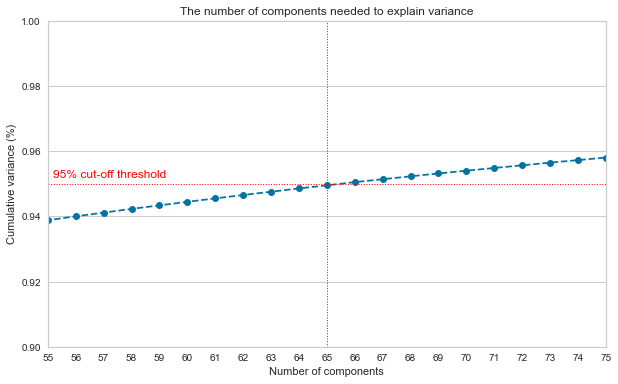

In [39]:
# Principal Component Analysis - PCA

# Find number of components

pca = PCA().fit(X_train)
plt.rcParams["figure.figsize"] = (10,6)

fig, ax = plt.subplots()
xi = range(X_train.shape[1])
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of components')
plt.xticks(np.arange(0, len(list(X_train.columns)), step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.rcParams['axes.facecolor'] = 'white'
plt.axvline(65, color='red', ls=':', lw=1)
plt.axhline(y=0.95, color='red', ls=':', lw=1)
plt.text(55.2, 0.952, '95% cut-off threshold', color = 'red', fontsize=12)
plt.axis([55, 75, 0.90, 1])
ax.grid(axis='x')
plt.show()

To get 95% of variance explained I need 65 principal components.

<b>Dimensionality Reduction with PCA algorithm and data modeling using default parameters</b>

In [40]:
model_score_pca = []

for model in models:
    
    pipe_pca = Pipeline([('PCA', PCA(n_components=65)),(model[0], model[1])])
    pipe_pca.fit(X_train, y_train)

    train_acc_score = accuracy_score(y_train, pipe_pca.predict(X_train))
    test_acc_score = accuracy_score(y_test, pipe_pca.predict(X_test))
    test_f1 = f1_score(y_test, pipe_pca.predict(X_test), average='weighted')
    test_precision = recall_score(y_test, pipe_pca.predict(X_test), average='weighted')
    test_recall = precision_score(y_test, pipe_pca.predict(X_test), average='weighted')
    
    model_score_pca.append([model[0], 
                            round(train_acc_score*100,2), 
                            round(test_acc_score*100,2), 
                            round(test_f1*100,2), 
                            round(test_precision*100,2), 
                            round(test_recall*100,2)])

    score_with_pca = pd.DataFrame(model_score_pca, 
                                  columns =['Model', 
                                            'Accuracy_train(%)',
                                            'Accuracy_test(%)',
                                            'f1_score(%)', 
                                            'Precision(%)', 
                                            'Recall(%)']).sort_values(by='Accuracy_test(%)', ascending=False)

#### Feature selection -  find a subset of the original set of  features to get a smaller subset

Select feature using the SelectFromModel with LogisticRegression and data modeling using default parameters.

In [41]:
# Find number of max_features

sfm_selector = SelectFromModel(estimator=LogisticRegression(max_iter = 2000)).fit(X_train, y_train)
print('Maximum number of features:', len(X_train.columns[sfm_selector.get_support()]))

Maximum number of features: 190


In [42]:
model_score_select = []


for model in models:
    
    pipe_select = Pipeline([('selection', SelectFromModel(LogisticRegression(max_iter=3000), max_features=190)), (model[0], model[1])])
    pipe_select.fit(X_train, y_train)
 
    train_acc_score = accuracy_score(y_train, pipe_select.predict(X_train))
    test_acc_score = accuracy_score(y_test, pipe_select.predict(X_test))
    test_f1 = f1_score(y_test, pipe_select.predict(X_test), average='weighted')
    test_precision = recall_score(y_test, pipe_select.predict(X_test), average='weighted')
    test_recall = precision_score(y_test, pipe_select.predict(X_test), average='weighted')

    model_score_select.append([model[0], 
                               round(train_acc_score*100,2), 
                               round(test_acc_score*100,2), 
                               round(test_f1*100,2), 
                               round(test_precision*100,2), 
                               round(test_recall*100,2)])
    
    score_with_feature_selection = pd.DataFrame(model_score_select, 
                                                columns =['Model', 
                                                          'Accuracy_train(%)',
                                                          'Accuracy_test(%)',
                                                          'f1_score(%)', 
                                                          'Precision(%)', 
                                                          'Recall(%)']).sort_values(by='Accuracy_test(%)', ascending=False)

In [43]:
score_with_pca

Model  Accuracy_train(%)  Accuracy_test(%)  f1_score(%)  \
0  LogisticRegression              97.62             94.23        94.21   
3                 SVM              97.84             93.62        93.62   
4             XGBoost             100.00             92.06        92.02   
2        RandomForest             100.00             90.80        90.75   
6          KNeighbors              97.13             89.72        89.66   
5          NaiveBayes              90.86             87.28        87.09   
1        DecisionTree              99.44             80.90        80.90   

   Precision(%)  Recall(%)  
0         94.23      94.33  
3         93.62      93.79  
4         92.06      92.10  
2         90.80      90.90  
6         89.72      90.02  
5         87.28      87.54  
1         80.90      81.00

In [44]:
score_with_feature_selection

Model  Accuracy_train(%)  Accuracy_test(%)  f1_score(%)  \
0  LogisticRegression              99.22             95.96        95.95   
3                 SVM              98.60             95.86        95.85   
4             XGBoost             100.00             93.32        93.29   
6          KNeighbors              98.30             92.67        92.62   
2        RandomForest             100.00             90.60        90.59   
5          NaiveBayes              88.87             87.24        86.79   
1        DecisionTree             100.00             84.05        84.01   

   Precision(%)  Recall(%)  
0         95.96      96.08  
3         95.86      95.92  
4         93.32      93.46  
6         92.67      93.01  
2         90.60      90.76  
5         87.24      88.71  
1         84.05      84.11

Feature extraction and feature selection methods to dimension reduction are not equivalent. Feature selection with SelectFromModel gives better result.

RandomForestClassifier, XGBoost, KNeighbors and DecisionTreeClassifier models are overfitting training data. The models performs well on the training data but doesn't perform well on the test data.

NaiveBayes algorithm is not overfitting, but get low test accuracy. 

The results scores show that the SVM and logistic regression models give the best classification on test data above 95% accuracy.

## Tuning models using Grid Search with cross-validation

In [45]:
labels = ["SITTING", "STANDING", "LYING", "WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"]

In [46]:
def confusionMatrix(test_target, pred_target):
    confusionMatrix = confusion_matrix(y_test, y_pred)
    
    precision = confusionMatrix/confusionMatrix.sum(axis = 0)
    recall = (confusionMatrix.T/confusionMatrix.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    plt.figure(figsize=(6,3))
    sns.heatmap(confusionMatrix, cmap = "Blues", annot = True, fmt = "1", linewidths=.5, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class', fontsize = 10)
    plt.ylabel('Original Class', fontsize = 10)
    plt.tick_params(labelsize = 10)
    plt.xticks(rotation = 90)
    plt.show()

In [47]:
model_score_after_tuning = []

Wall time: 0 ns
Fitting 5 folds for each of 54 candidates, totalling 270 fits
{'SVM__C': 14, 'SVM__gamma': 0.05}


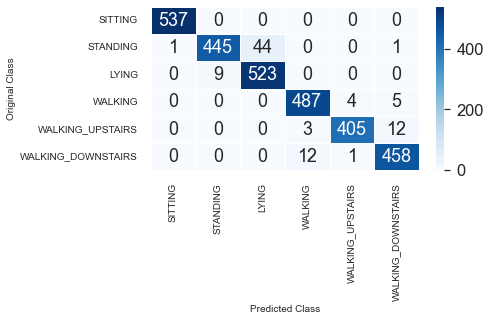

                    precision    recall  f1-score   support

           SITTING       1.00      1.00      1.00       537
          STANDING       0.98      0.91      0.94       491
             LYING       0.92      0.98      0.95       532
           WALKING       0.97      0.98      0.98       496
  WALKING_UPSTAIRS       0.99      0.96      0.98       420
WALKING_DOWNSTAIRS       0.96      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [48]:
%time
step = [('selection', SelectFromModel(LogisticRegression(max_iter=2000), max_features=190)), ('SVM', SVC(kernel ='rbf', max_iter=5000))] 
pipeline = Pipeline(step)

parameters = {'SVM__C': [0.5, 1, 4, 7, 8, 10, 12, 14, 16],
              'SVM__gamma': ['scale', 'auto', 0.01, 0.05, 0.1, 1]
             }

# Tuning parameters for Support Vector Machine
svm_grid = GridSearchCV(pipeline, 
                    param_grid=parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1)

svm_grid.fit(X_train, y_train)

pparam=pprint.PrettyPrinter(indent=2)
print(svm_grid.best_params_)

y_pred = svm_grid.predict(X_test)
#Scores
train_acc_score = accuracy_score(y_train, svm_grid.predict(X_train))
test_acc_score = accuracy_score(y_test, svm_grid.predict(X_test))
test_f1 = f1_score(y_test, svm_grid.predict(X_test), average='weighted')
test_precision = recall_score(y_test, svm_grid.predict(X_test), average='weighted')
test_recall = precision_score(y_test, svm_grid.predict(X_test), average='weighted')

model_score_after_tuning.append(['SVM', round(train_acc_score*100,2), round(test_acc_score*100,2), round(test_f1*100,2), round(test_precision*100,2), round(test_recall*100,2)])
         
confusionMatrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = labels))

From the confusion matrix 3 we can conclude that there is a problem with classifying between "STANDING" and "LYING".

Wall time: 0 ns
Fitting 5 folds for each of 35 candidates, totalling 175 fits
{'LR__C': 4, 'LR__solver': 'liblinear'}


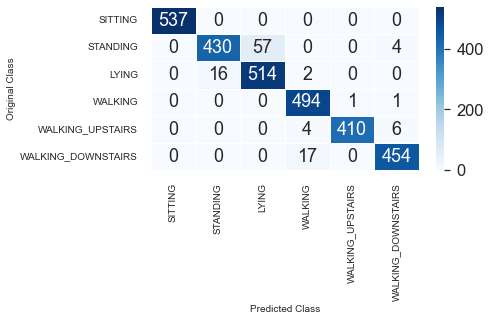

                    precision    recall  f1-score   support

           SITTING       1.00      1.00      1.00       537
          STANDING       0.96      0.88      0.92       491
             LYING       0.90      0.97      0.93       532
           WALKING       0.96      1.00      0.98       496
  WALKING_UPSTAIRS       1.00      0.98      0.99       420
WALKING_DOWNSTAIRS       0.98      0.96      0.97       471

          accuracy                           0.96      2947
         macro avg       0.97      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [49]:
%time
step = [('selection', SelectFromModel(LogisticRegression(max_iter=2000), max_features=190)), ('LR', LogisticRegression('l2', max_iter=2000))]
pipeline = Pipeline(step)

parameters = {'LR__C': [0.1, 1, 4, 7, 8, 10, 12],
              'LR__solver' : ['lbfgs','newton-cg','liblinear','sag','saga']
             }

# Tuning parameters for logistic regression
lr_grid = GridSearchCV(pipeline, 
                    param_grid=parameters, 
                    cv=5, 
                    verbose=1, 
                    n_jobs=-1)

lr_grid.fit(X_train, y_train)

pparam=pprint.PrettyPrinter(indent=2)
print(lr_grid.best_params_)

y_pred = lr_grid.predict(X_test)
#Scores
train_acc_score = accuracy_score(y_train, lr_grid.predict(X_train))
test_acc_score = accuracy_score(y_test, lr_grid.predict(X_test))
test_f1 = f1_score(y_test, lr_grid.predict(X_test), average='weighted')
test_precision = recall_score(y_test, lr_grid.predict(X_test), average='weighted')
test_recall = precision_score(y_test, lr_grid.predict(X_test), average='weighted')

model_score_after_tuning.append(['LR', round(train_acc_score*100,2), round(test_acc_score*100,2), round(test_f1*100,2), round(test_precision*100,2), round(test_recall*100,2)])
confusionMatrix(y_test, y_pred)
print(classification_report(y_test, y_pred, target_names = labels))

In [50]:
result = pd.DataFrame(model_score_after_tuning, columns =['Model', 
                                                          'Accuracy(%)_train',
                                                          'Accuracy(%)_test',
                                                          'f1_score(%)',
                                                          'Precision(%)',
                                                          'Recall(%)']).sort_values(by='Accuracy(%)_train', ascending=False)
result

Model  Accuracy(%)_train  Accuracy(%)_test  f1_score(%)  Precision(%)  \
0   SVM             100.00             96.88        96.87         96.88   
1    LR              99.29             96.34        96.32         96.34   

   Recall(%)  
0      96.95  
1      96.44

SUPPORT VECTOR MACHINES with RBF kernel model based on features selection by SelectFromModel and hyperparameters (C=14, gamma=0.05) identify and predict the majority of the six activities with a high degree of accuracy 96.9%. It's a very good result. The model confused some data examples, the inaccuracy refers mostly to SITTING and STANDING records. In fact a small portion of the data was misclassified. Data modeling with best parameters gave 0.5% better accurracy results on test data.

There are 44 cases of STANDING person classified as LYING and contrariwise 9 cases refering to a person LYING classified as STANDING. 
There are 12 cases of person WALKING_DOWNSTAIRS that were classified as WALKING. 

LOGISTIC REGRESSION model (C= 4 and solver='liblinear') did also a good job in classifying activities with accuracy of 96.3%.

## Summary

In this project, I have approached the human activity recognition problem using supervised learning.
I explored and visualized the data using matplotlib, seaborn and plotly modules.

Then I divided the data into 2 and 6 different clusters using K-Means Clustering and visualized high-dimensional data on scatterplots.

Finally, I applied  machine learning algorithms to Multiclass Classification and found the optimal hyperparameters using GridSearch with cross-validation.

I found out that Support Vector Machine achieves best prediction accuracy among all the classifiers. The results show that the SVM algorithm with a rbf type kernel classify different activities with accuracy of almost 97% 



## References

https://simpleactivity435203168.wordpress.com/2018/06/28/gyroscope-and-accelerometer-with-ionic-3/